# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import  models,layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE =32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

# Load Data

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets_ML_AI_DL/PlantVillage",
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size =(IMAGE_SIZE,IMAGE_SIZE)

)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 0 1 2 0 0 1 1 0 1 2 2 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 2 1 0]


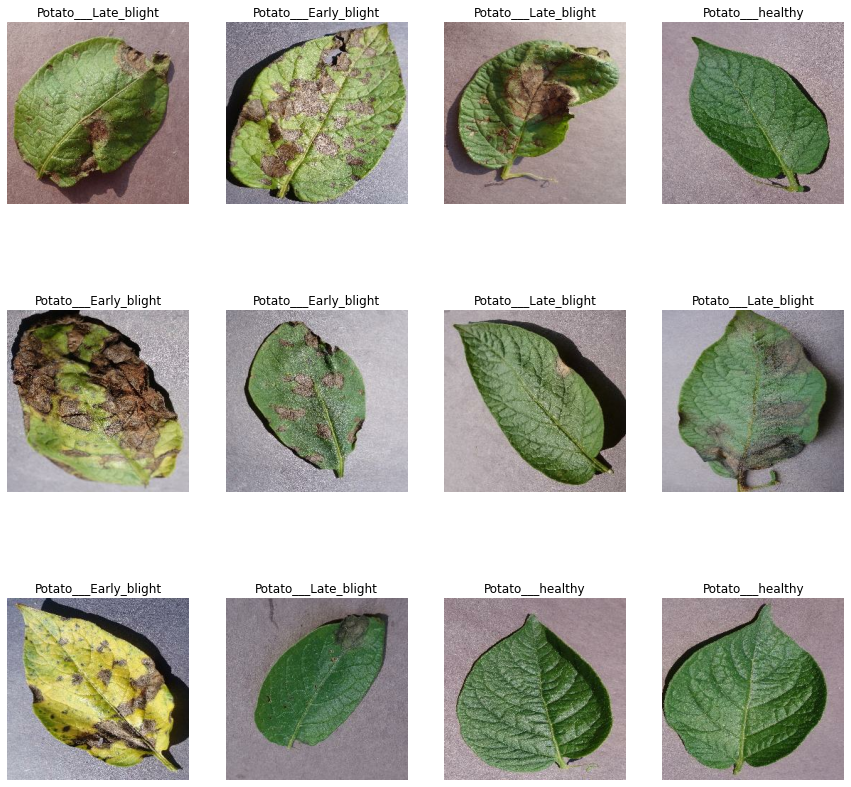

In [ ]:
plt.figure(figsize=(15,15))
for image_batch , labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

In [ ]:
#80% ==> Training
#20% ==> test
  #10% ==> validation
  #10% ==> Test

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_splt=0.1,shuffle=True,shuffle_size=10000 ):
  assert (train_split+test_splt+val_split) == 1
  ds_size = len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size= int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds,test_ds

In [ ]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)
len(val_ds)
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for image_batch,labels_batch in dataset.take(1):
  print(image_batch[0].numpy()/255) 

[[[0.80784315 0.75686276 0.73333335]
  [0.7921569  0.7411765  0.7176471 ]
  [0.79607844 0.74509805 0.72156864]
  ...
  [0.7411765  0.67058825 0.6627451 ]
  [0.7372549  0.6666667  0.65882355]
  [0.7294118  0.65882355 0.6509804 ]]

 [[0.78039217 0.7294118  0.7058824 ]
  [0.77254903 0.72156864 0.69803923]
  [0.78039217 0.7294118  0.7058824 ]
  ...
  [0.7176471  0.64705884 0.6392157 ]
  [0.70980394 0.6392157  0.6313726 ]
  [0.7019608  0.6313726  0.62352943]]

 [[0.78431374 0.73333335 0.70980394]
  [0.78039217 0.7294118  0.7058824 ]
  [0.78431374 0.73333335 0.70980394]
  ...
  [0.7019608  0.6313726  0.62352943]
  [0.69411767 0.62352943 0.6156863 ]
  [0.6901961  0.61960787 0.6117647 ]]

 ...

 [[0.5019608  0.39215687 0.38039216]
  [0.48235294 0.37254903 0.36078432]
  [0.46666667 0.35686275 0.34509805]
  ...
  [0.54901963 0.4392157  0.42745098]
  [0.5568628  0.44705883 0.43529412]
  [0.5568628  0.44705883 0.43529412]]

 [[0.52156866 0.4117647  0.4       ]
  [0.47843137 0.36862746 0.35686275]


In [ ]:
resize_and_rescale = tf.keras.Sequential([
              layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
              layers.experimental.preprocessing.Rescaling(1.0/255)
])
data_augmentation = tf.keras.Sequential([
              layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
              layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3

CNNmodel = models.Sequential([
                   resize_and_rescale,
                   data_augmentation,
                   layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),   
                               
                   layers.Flatten(),
                   layers.Dense(64,activation="relu"),
                   layers.Dense(n_classes,activation='softmax'),                 

])
#print(input_shape)
CNNmodel.build(input_shape=input_shape)


In [ ]:
CNNmodel.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_28 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_29 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_178 (Conv2D)         (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_178 (MaxPooli  (32, 127, 127, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_179 (Conv2D)         (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_179 (MaxPooli  (32, 62, 62, 64)         0         
 ng2D)                                               

In [ ]:
CNNmodel.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = CNNmodel.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS 
)

Epoch 1/50
54/54 [==============================] - 316s 3s/step - loss: 0.9376 - accuracy: 0.4664 - val_loss: 0.8805 - val_accuracy: 0.4948
Epoch 2/50
54/54 [==============================] - 182s 3s/step - loss: 0.8253 - accuracy: 0.5660 - val_loss: 0.5541 - val_accuracy: 0.7812
Epoch 3/50
54/54 [==============================] - 182s 3s/step - loss: 0.5966 - accuracy: 0.7512 - val_loss: 0.6378 - val_accuracy: 0.7292
Epoch 4/50
54/54 [==============================] - 182s 3s/step - loss: 0.4107 - accuracy: 0.8339 - val_loss: 0.4183 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 182s 3s/step - loss: 0.2880 - accuracy: 0.8831 - val_loss: 0.3148 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 183s 3s/step - loss: 0.2160 - accuracy: 0.9184 - val_loss: 0.2015 - val_accuracy: 0.9375
Epoch 7/50
54/54 [==============================] - 182s 3s/step - loss: 0.1795 - accuracy: 0.9334 - val_loss: 0.6193 - val_accuracy: 0.7812
Epoch 8/50
54

In [ ]:
scores = CNNmodel.evaluate(test_ds)
print(scores)

8/8 [==============================] - 13s 823ms/step - loss: 0.1020 - accuracy: 0.9727
[0.10203869640827179, 0.97265625]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
val_loss = history.history['val_loss']
loss =history.history['loss']

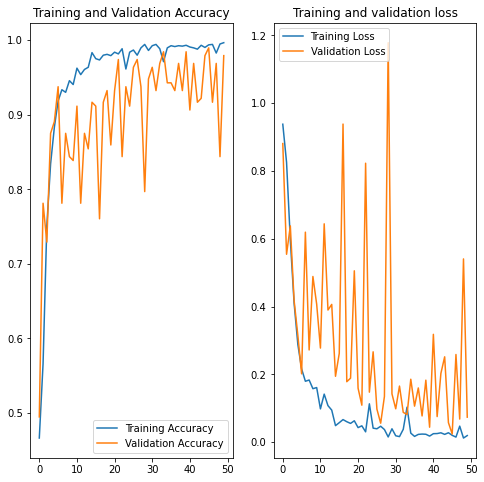

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and validation loss')
plt.show()

# Actual vs Predict

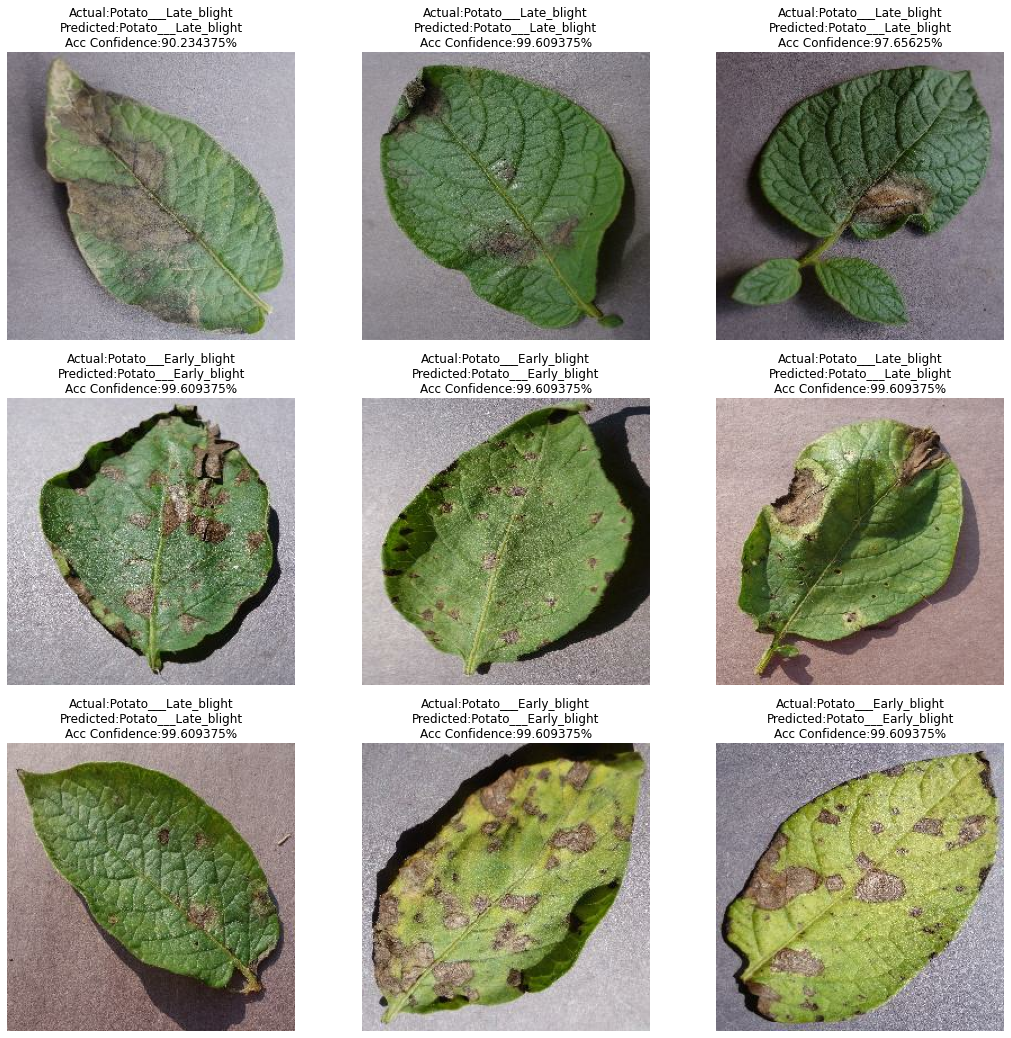

In [ ]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  #plt.imshow(first_image)
  
  plt.figure(figsize=(18,18))
  for i in range(9):
    plt.subplot(3,3,i+1)
    prediction_value = CNNmodel.predict(image_batch)
    prediction_value_name=class_names[np.argmax(prediction_value[i])]
    actual_value_name = class_names[labels_batch[i].numpy()]
    confidence = (round(100*(np.max(image_batch[i])),2)/256)
    confidence_str = str(confidence)
   # print(confidence_str)
   # print("First image to predict")
   # print("Actual value:::"+actual_value_name)
   # print("Prediction value::"+prediction_value_name)
    first_image = image_batch[i].numpy().astype('uint8')
    plt.imshow(first_image)
    plt.title("Actual:"+(actual_value_name)+"\nPredicted:"+(prediction_value_name)+"\nAcc Confidence:"+(confidence_str)+"%")
    #plt.title()
    plt.axis("off")
 